In [56]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [57]:


heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)



Saving figure law_of_large_numbers_plot


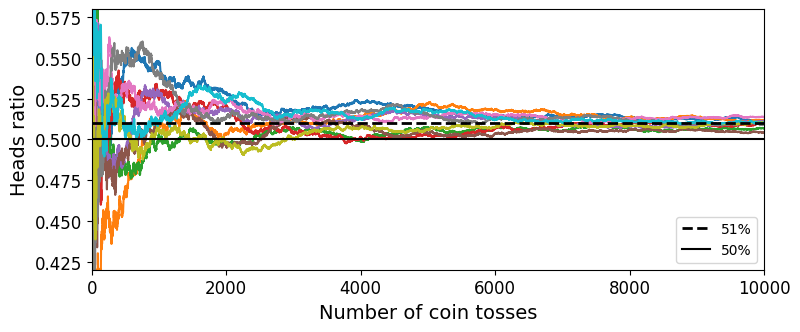

In [58]:


plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
save_fig("law_of_large_numbers_plot")
plt.show()



In [59]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'hard'
)



In [61]:


voting_clf.fit(X_train, y_train)



,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


**Looking at each Classifiers Accuracy**

In [62]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train,y_train )
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.888


In [63]:
##Bagging and Pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    max_samples=100, bootstrap = True, n_jobs=-1
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [64]:
##Out of Bag Evaluation
#During bagging whatever instances are not considered are called as out of Bag instances

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True
)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9013333333333333

In [65]:
from sklearn.metrics import accuracy_score
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.896

In [66]:
bag_clf.oob_decision_function_

array([[0.36312849, 0.63687151],
       [0.41358025, 0.58641975],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.07446809, 0.92553191],
       [0.31547619, 0.68452381],
       [0.01169591, 0.98830409],
       [0.99447514, 0.00552486],
       [0.97633136, 0.02366864],
       [0.7740113 , 0.2259887 ],
       [0.01724138, 0.98275862],
       [0.8372093 , 0.1627907 ],
       [0.83060109, 0.16939891],
       [0.953125  , 0.046875  ],
       [0.04733728, 0.95266272],
       [0.00540541, 0.99459459],
       [0.96938776, 0.03061224],
       [0.91860465, 0.08139535],
       [0.98360656, 0.01639344],
       [0.02970297, 0.97029703],
       [0.32795699, 0.67204301],
       [0.9027027 , 0.0972973 ],
       [1.        , 0.        ],
       [0.95187166, 0.04812834],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66111111, 0.33888889],
       [0.

The Bagging Classifier support sampling controlled by hyperparameters max_features & bootstrap_features

**Sampling means picking a smaller no of rows and/or columns**


| Type                  | What gets sampled?   | Description                                                              |
| --------------------- | -------------------- | ------------------------------------------------------------------------ |
| **Instance Sampling** | Rows (data points)   | Like bagging or pasting: random subsets of training examples.            |
| **Feature Sampling**  | Columns (features)   | Used to make each model focus on different input variables.              |
| **Random Patches**    | Rows **and** columns | Combines both instance and feature sampling — creates maximum diversity. |


In [67]:
#####Random Forest

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)


y_pred_rf = rnd_clf.predict(X_test)

In [68]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter = "random", max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
)

In [69]:
##Foll code trains a randomforestclassifier on the iris dataset

from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs = -1)
rnd_clf.fit(iris["data"],iris["target"])
for name,score in zip(iris["feature_names"],rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09934873593966811
sepal width (cm) 0.02288187581472086
petal length (cm) 0.4167536451372604
petal width (cm) 0.46101574310835064


**Ada Boosting**


In [70]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), n_estimators=200,
    algorithm='SAMME', learning_rate=0.5  #samme.r isnt supported in newer version
)
ada_clf.fit(X_train, y_train)

c:\Users\varad\OneDrive\Documents\Aurelian Geron\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,200
,learning_rate,0.5
,algorithm,'SAMME'
,random_state,None
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


✅ AdaBoost (Adaptive Boosting)           
    Intuition: Focuses on misclassified samples.           
    How it works:
        Starts with equal weights for all training instances.             
        Trains a weak learner (like a shallow decision tree).            
        Increases the weight of misclassified instances.                    
        The next learner focuses more on the hard cases.                
        Final prediction is a weighted vote of all learners.                   
📌 So, data weights are updated after each model based on performance.              
✅ Gradient Boosting                               
    Intuition: Focuses on errors (residuals) of the model.                
    How it works:                   
        Trains a model to predict the target.                     
        Computes the residual errors (what’s left unexplained).                 
        Trains the next model to predict these residuals.                 
        Repeats the process.                      
        Final prediction = sum of all weak learners.                 

In [71]:
##Gradient Boosting


np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)



In [72]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)  #This is the 1st DTRegressor    

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [73]:
#Training 2nd DTRegressor on residual errors of 1st DTRegressor
y2 = y- tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [74]:
##Now training 3rd DTRegressor on residual errors of 2nd DTRegressor

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [75]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))


y_pred




array([0.75026781])

In [76]:
#Finding the optimal no of trees in gradient boosting

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_val, y_train, y_val = train_test_split(X,y)

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) +1

gbrt_best = GradientBoostingRegressor(max_depth = 2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,np.int64(53)
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


NameError: name 'plot_predictions' is not defined

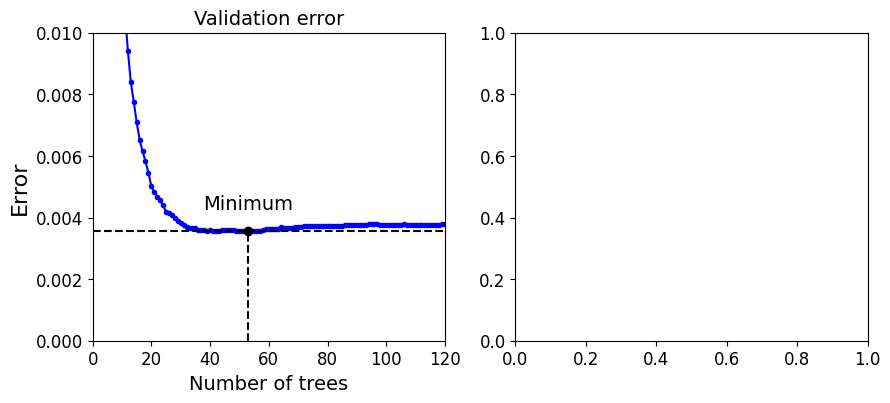

In [77]:
min_error = np.min(errors)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(np.arange(1, len(errors) + 1), errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

save_fig("early_stopping_gbrt_plot")
plt.show

In [78]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up=0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error <min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up ==5:
            break
            
         ##this is early stopping to prevent overfitting

In [80]:
!pip install xgboost

  Using cached xgboost-3.0.3-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.3-py3-none-win_amd64.whl (149.9 MB)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb_reg = XGBRegressor(random_state=42)

xgb_reg.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=2,
    verbose=True
)

y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)
print("Validation MSE:", val_error)


TypeError: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'